In [1]:
import pandas
import numpy as np
%matplotlib inline

In [4]:
df = pandas.read_csv('data/201508_trip_data.csv.gz', parse_dates=[2,5])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 11 columns):
Trip ID            354152 non-null int64
Duration           354152 non-null int64
Start Date         354152 non-null datetime64[ns]
Start Station      354152 non-null object
Start Terminal     354152 non-null int64
End Date           354152 non-null datetime64[ns]
End Station        354152 non-null object
End Terminal       354152 non-null int64
Bike #             354152 non-null int64
Subscriber Type    354152 non-null object
Zip Code           353874 non-null object
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 29.7+ MB


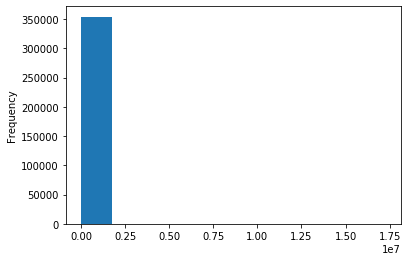

In [6]:
df['Duration'].plot.hist()

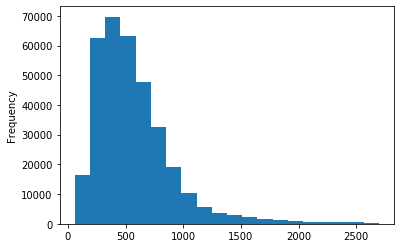

In [8]:
df[df['Duration'] < 60*45]['Duration'].plot.hist(bins=20)

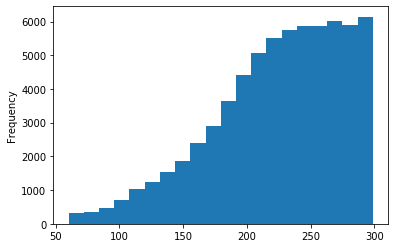

In [10]:
df[df['Duration'] < 60*5]['Duration'].plot.hist(bins=20)

In [17]:
df.groupby('Bike #')['Duration'].sum().sort_values().tail(5)

Bike #
382     1272407
415     1356383
680     1975366
466     2663894
535    17714865
Name: Duration, dtype: int64

In [18]:
df.groupby('Bike #')['Duration'].size().sort_values().tail(5)

Bike #
532    1074
463    1085
489    1101
392    1102
878    1121
Name: Duration, dtype: int64

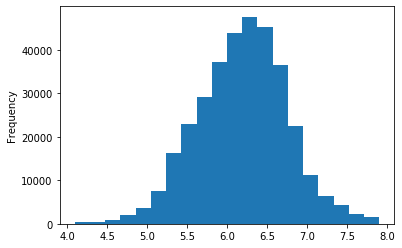

In [11]:
np.log(df[df['Duration'] < 60*45]['Duration']).plot.hist(bins=20)

In [12]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069


In [14]:
stations = df.groupby('Start Station').size().sort_values().tail(5)
stations

Start Station
Embarcadero at Sansome                           14158
Temporary Transbay Terminal (Howard at Beale)    14436
Harry Bridges Plaza (Ferry Building)             17255
San Francisco Caltrain 2 (330 Townsend)          21758
San Francisco Caltrain (Townsend at 4th)         26304
dtype: int64

In [20]:
raw_data = df[df['Start Station'].apply(lambda x: x in stations)]

In [21]:
raw_data.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
7,913450,255,2015-08-31 22:16:00,Embarcadero at Sansome,60,2015-08-31 22:20:00,Steuart at Market,74,470,Subscriber,94111
10,913443,691,2015-08-31 21:49:00,Embarcadero at Sansome,60,2015-08-31 22:01:00,Market at Sansome,77,434,Subscriber,94109
14,913435,424,2015-08-31 21:25:00,Temporary Transbay Terminal (Howard at Beale),55,2015-08-31 21:33:00,San Francisco Caltrain 2 (330 Townsend),69,602,Subscriber,94401
15,913434,283,2015-08-31 21:19:00,San Francisco Caltrain 2 (330 Townsend),69,2015-08-31 21:24:00,Townsend at 7th,65,521,Subscriber,94107


In [34]:
counts_1h = (raw_data
  .groupby(['Start Date', 'Start Station'])
  .size()
  .reset_index(name='Count')
  .pivot_table(index='Start Date', columns='Start Station', values='Count')
  .fillna(0)).resample('1h').sum()

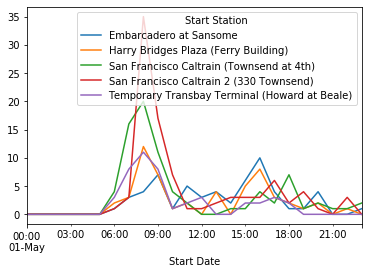

In [35]:
counts_1h['2015-05-01'].plot.line()

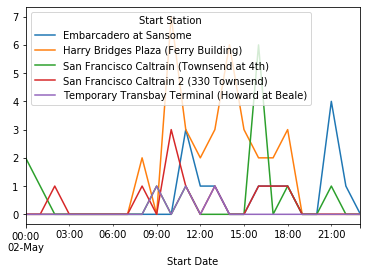

In [36]:
counts_1h['2015-05-02'].plot.line()

In [37]:
df['Date'] = df['Start Date'].apply(lambda x: x.date())

In [38]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Date
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,2015-08-31
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032,2015-08-31
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107,2015-08-31
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113,2015-08-31
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069,2015-08-31


In [39]:
df['Hour'] = df['Start Date'].apply(lambda x: x.hour)

In [44]:
total_counts = (df
 .groupby(['Hour', 'Date'])
 .size()
 .reset_index(name='Count')
 .pivot_table(index='Date', columns='Hour', values='Count')
 .fillna(0))

In [45]:
from sklearn.cluster import KMeans

In [47]:
k_max = 6

In [48]:
models = [KMeans(k).fit(total_counts) for k in range(1, k_max)]

In [49]:
models

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0)]

In [51]:
import matplotlib.pyplot as plt

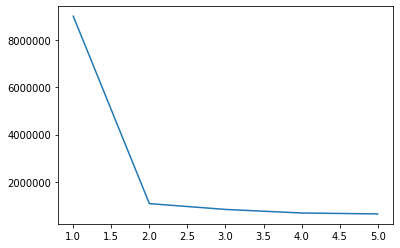

In [52]:
plt.plot(range(1, k_max), [m.inertia_ for m in models])

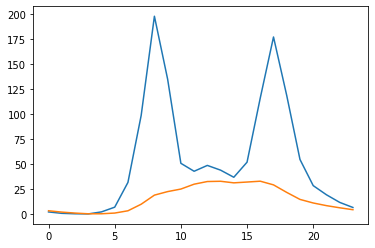

In [56]:
plt.plot(models[1].cluster_centers_.T)

In [57]:
total_counts['Cluster'] = models[1].labels_